In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from PIL import Image

from stable_fluid.fluid import Fluid

RESOLUTION = 150, 400, 100
DURATION = 1000

INFLOW_DURATION = 1000
INFLOW_VELOCITY = 1
INFLOW_COUNT = 1


In [2]:

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device: ", device)
fluid = Fluid(RESOLUTION, 'dye', viscosity = 0.01, device = device)

inflow_velocity = torch.zeros_like(fluid.velocity, device=device)
inflow_velocity[1, 70:80, 0:8, 70:80] += INFLOW_VELOCITY
inflow_dye = torch.zeros(fluid.shape, device=device)
inflow_dye[70:80, 0:8, 70:80] = 1.0


device:  cuda


In [3]:
print(fluid.shape)

(150, 400, 100)


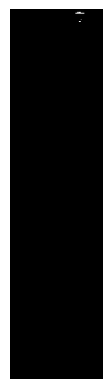

In [ ]:

plt.ioff()  # interactive mode 끄기
fig, ax = plt.subplots()
im = ax.imshow(np.zeros(RESOLUTION[1:]), cmap='gray', vmin=0, vmax=1)
plt.axis('off')

for f in range(DURATION):
    if f <= INFLOW_DURATION:
        fluid.velocity += inflow_velocity
        fluid.dye += inflow_dye
    fluid.step()

    dye_cpu = fluid.dye.cpu().numpy()
    dye_cpu[dye_cpu >= 1] = 1
    frame = dye_cpu[75]
    im.set_data(frame)
    display(fig)
    clear_output(wait=True)
    